In [2]:
from __future__ import print_function
import torch

In [3]:
x = torch.empty(5,3)
print(x)

tensor([[0.0000e+00, 1.5846e+29, 0.0000e+00],
        [1.5846e+29, 2.2335e+08, 2.2369e+08],
        [3.7786e-33, 1.4013e-45, 0.0000e+00],
        [1.5846e+29, 0.0000e+00, 1.5846e+29],
        [1.9490e-31, 1.4013e-45, 4.5592e-33]])


In [4]:
x = torch.rand(5,3)
print(x)

tensor([[0.6477, 0.2447, 0.5698],
        [0.7142, 0.0823, 0.9977],
        [0.9005, 0.0212, 0.5388],
        [0.3617, 0.2379, 0.9305],
        [0.3702, 0.0148, 0.8416]])


In [5]:
x = x.new_ones(5,3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.3282, -1.4849,  0.7059],
        [ 0.2697,  0.5314, -0.0000],
        [-0.4815,  0.5459, -0.8403],
        [ 0.4003, -0.9807, -1.8657],
        [ 1.1189,  0.0144,  1.0006]])


In [11]:
y = torch.rand(5,3)
result = torch.empty(5,3)
torch.add(x,y, out=result)
print(result)
y.add_(x)
print(y[:,1])
print(y[1,:])

tensor([[ 0.5699, -0.7492,  0.7360],
        [ 0.8164,  1.1629,  0.9162],
        [ 0.1616,  0.8325, -0.2991],
        [ 0.4608, -0.9473, -1.8563],
        [ 1.1415,  0.3074,  1.0365]])
tensor([-0.7492,  1.1629,  0.8325, -0.9473,  0.3074])
tensor([0.8164, 1.1629, 0.9162])


In [12]:
x = torch.randn(4,4)
y = x.view(-1,8)
print(y)
print(y.size())

tensor([[-0.1503, -2.6838,  0.5754,  1.1955,  0.8516,  0.5470, -1.2531, -0.5835],
        [ 0.0397, -1.3252, -0.4625,  0.5855,  0.6534, -0.2230,  0.3319, -0.3777]])
torch.Size([2, 8])


In [13]:
a = torch.ones(5)
a = a.numpy()

In [15]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device = device)
    x = x.to(device)
    z = x+y
    print(z)
    print(z.to("cpu", torch.double))
else:
    print("Oh no")

Oh no


Autograd and Automatic Differentiation

In [16]:
x = torch.ones(2,2, requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [18]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [19]:
print(y.grad_fn)

In [21]:
z = y*y*3
out = z.mean()
print(z)
print("um")
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)
um
tensor(27., grad_fn=<MeanBackward1>)


In [22]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

tensor([[-3.6243, 15.3949],
        [-6.9522, -0.1240]])
False
True


Gradients and Backprop

In [23]:
out.backward()

Out contains a single scalar, so out.backward() indicates that you want to find out the derivative of it.
x.grad gives d(out)/dx

In [24]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [25]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-523.0026, -498.2172, -780.1342], grad_fn=<MulBackward>)


Here y is not a scalar, so gradients is a equal sized matrix that stores dy/dx values.

In [26]:
gradients = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(gradients)
print(y)
print(x.grad)

tensor([-523.0026, -498.2172, -780.1342], grad_fn=<MulBackward>)
tensor([ 51.2000, 512.0000,   0.0512])


# Neural Nets

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

`nn.Conv2d` takes in a 4D tensor = nSamples x nChannels x Height x Width 

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # one input channel
        # 6 o/p channels
        # 5x5 square conv
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        # y = Wx+b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a 2,2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        
        #If size is a square
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [31]:
params = list(net.parameters())
# print(params)
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [32]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[ 0.0007, -0.0877, -0.0953,  0.0516, -0.0290, -0.0917, -0.0827, -0.1232,
          0.0462,  0.0583]], grad_fn=<ThAddmmBackward>)


## Loss Function

In [38]:
output = net(input)
target = torch.randn(10)
# print(target.shape)
print(target)
target = target.view(1, -1)
print(target)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor([ 0.5229,  1.3382,  0.2886, -0.5921, -0.2246,  2.2486,  0.0920,  0.1198,
        -0.6048,  0.9101])
tensor([[ 0.5229,  1.3382,  0.2886, -0.5921, -0.2246,  2.2486,  0.0920,  0.1198,
         -0.6048,  0.9101]])
tensor(0.9621, grad_fn=<MseLossBackward>)


In [40]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## Backprop

Clear existing gradients, to avoid any accumulation

In [41]:
net.zero_grad() # zeroes the gradient buffers 

print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)

loss.backward()

print("Bias gradient after backward")
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
Bias gradient after backward
tensor([ 0.0186, -0.0028,  0.0195,  0.0324,  0.0350,  0.0090])


## Updating Weights

Stochastic Gradient Descent:

weight = weight - learning_rate * gradient

If we need to use other update rules like Nesterov-SGD, Adam, RMsProp etc, we use torch.optim

In [42]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [43]:
import torch.optim as optim

# Creating optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()

# Updates here
optimizer.step()

# Classification

## Training

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms

In [48]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download = True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle=False, num_workers=2)
classes = ('plane','car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck plane   cat   car


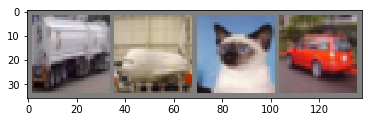

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'% classes[labels[j]] for j in range(4)))

In [52]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #`nn.Conv2d` takes in a 4D tensor = nSamples x nChannels x Height x Width 
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
net = Net()


### Define a loss function and optimizer

In [53]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum =0.9)


### Training the network

In [57]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d,%5d] loss: %3f'%(epoch+1, i+1, running_loss/2000))
        running_loss=0.0
print("Training complete")

[1, 2000] loss: 0.000842
[1, 4000] loss: 0.001047
[1, 6000] loss: 0.000632
[1, 8000] loss: 0.000471
[1,10000] loss: 0.001068
[1,12000] loss: 0.000347
[2, 2000] loss: 0.000443
[2, 4000] loss: 0.000782
[2, 6000] loss: 0.000319
[2, 8000] loss: 0.000545
[2,10000] loss: 0.000606
[2,12000] loss: 0.001304
Training complete


### Testing

GroundTruth:    cat  ship  ship plane


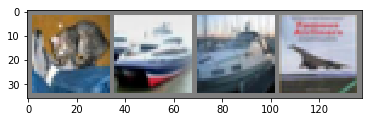

In [58]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [59]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' %classes[predicted[j]] for j in range(4)))

Predicted:    cat   car plane plane


Performance

In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy = %d' % (100*correct/total))

Accuracy = 54


Analysing performance based on class

In [62]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs,1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%'% (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 68 %
Accuracy of  bird : 42 %
Accuracy of   cat : 28 %
Accuracy of  deer : 37 %
Accuracy of   dog : 57 %
Accuracy of  frog : 68 %
Accuracy of horse : 66 %
Accuracy of  ship : 46 %
Accuracy of truck : 53 %
